In [258]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import *
from qutip import *
from mpl_toolkits.mplot3d import Axes3D   
from matplotlib import cm   
from pylab import *  

# Define constants 

N = 20 # Size of Hillbert space
chi = 2* pi * 325* 1e3 # Kerr constant

a = destroy(N) # Annihilation operator


# Define q function range
xvec2 = linspace(-3,3,17) 

# Grid over which we calculate Husimi/Wigner functions
X, Y = meshgrid(xvec2, xvec2)
alpha = X + Y * 1j

# Defining a Husimi function that takes a state as an input
def husimi(x, state, N, num):  
    psi_new=(displace(N,x)*fock(N, num)).unit();
    rho = state * state.dag()
    q_new= 1/pi*(psi_new.dag() * rho * psi_new)
    return q_new.full()

# Defining a Husimi function that takes a density matrix as an input
def husimi2(x, density, N):
    psi_new = (displace(N,x)*fock(N,0)).unit();
    q_new = 1/pi*(psi_new.dag() * density * psi_new);
    return q_new



In [42]:
t = linspace(0,10e-6,10000)
# we start with a coherent state with alpha=2.0
psi1 = coherent(20, 2)
kappa = 2* pi * 250e3 # decoherence rate

# the Kerr Hamiltonian
H = 0.5 * chi * a.dag() * a.dag() * a * a 
c_op = []
c_op.append(sqrt(kappa) * a)
# and evolve the state under the influence of the hamiltonian. 
# by passing an empty list as expecation value operators argument and c_op for loss rate, 
# we get the full state of the system in result.states
result = mesolve(H, psi1, t, c_op, [])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


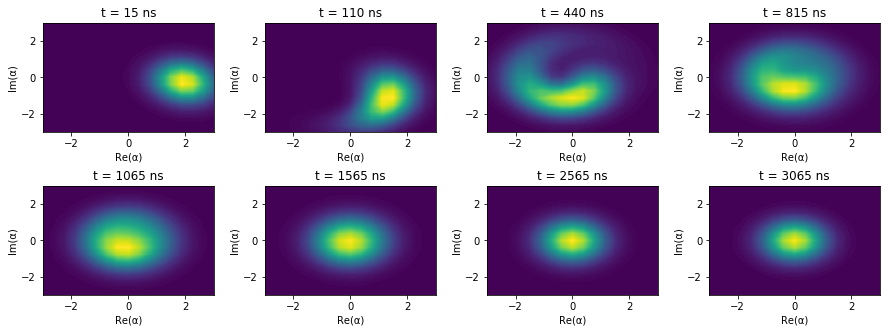

In [43]:
#Here we plot the Husimi function at different times

q_result2 = zeros((len(alpha), len(alpha)))

#Times of important events
time = [15, 110, 440, 815, 1065, 1565, 2565, 3065]

fig2, axes2 = plt.subplots(2, 4, figsize=(15,5))

def plotatt(ti):
    for i in range(len(alpha)):
        for j in range(len(alpha)):
            first = husimi2(alpha[i,j], result.states[ti], 20)
            second = first[0,]
            third = second[0,]
            q_result2[i,j] = third[0,]
    return q_result2
    
for k in range(len(time)):
    axes2 = axes2.flatten()
    cont2 = axes2[k].contourf(alpha.real, alpha.imag, plotatt(time[k]),100)
    cont3 = axes2[k].set_title("t = %i ns" %time[k])
    axes2[k].set_xlabel('Re(α)')
    axes2[k].set_ylabel('Im(α)')

plt.subplots_adjust(None, None, None, wspace = 0.3, hspace = 0.5)
plt.show()
plt.savefig("husimis.png")

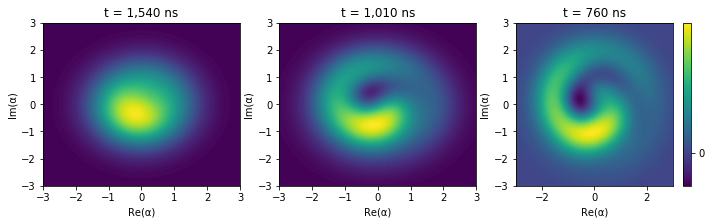

In [44]:
# Wigner Function calculation

xvec1 = linspace(-3, 3, 200)

# Plotting at the same times as the paper
W = wigner(result.states[1540], xvec1, xvec1)
W1= wigner(result.states[1010],xvec1, xvec1)
W2 = wigner(result.states[760],xvec1, xvec1)


fig3, axes3 = plt.subplots(1, 3, figsize=(12,3))
cont2 = axes3[0].contourf(xvec1, xvec1, W, 100)
cont3 = axes3[1].contourf(xvec1, xvec1,W1,100)
cont4 = axes3[2].contourf(xvec1, xvec1, W2, 100)
lbl0 = axes3[0].set_title("t = 1,540 ns")
lbl1 = axes3[1].set_title("t = 1,010 ns")
lbl2 = axes3[2].set_title("t = 760 ns")
axes3[0].set_xlabel('Re(α)')
axes3[0].set_ylabel('Im(α)')
axes3[1].set_xlabel('Re(α)')
axes3[1].set_ylabel('Im(α)')
axes3[2].set_xlabel('Re(α)')
axes3[2].set_ylabel('Im(α)')
plt.colorbar(cont4, ticks=[-.2, 0, .2])
plt.show()


In [6]:
t1 = linspace(0,10e-6,10000)
# we start with a coherent state with alpha=2.0
psi2 = coherent(20, 0)
kappa1 = 2* pi * 10e3 # decoherence rate

# the Kerr Hamiltonian
H1 = 0.5 * chi * a.dag() * a.dag() * a * a 
c_op1 = []
c_op1.append(sqrt(kappa) * a)
# and evolve the state under the influence of the hamiltonian. 
# by passing an empty list as expecation value operators argument and c_op for loss rate, 
# we get the full state of the system in result.states
result1 = mesolve(H1, psi2, t1, c_op1, [])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


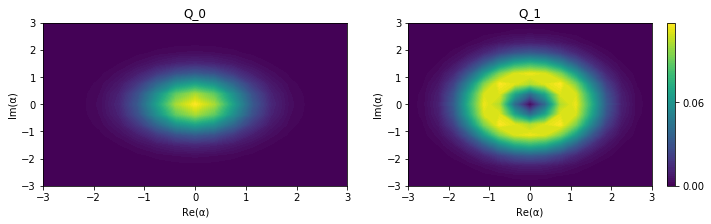

In [27]:
# Husimi plots for fock states 0 and 1 at full revival time
q_coherent1 = zeros((len(alpha), len(alpha)))
q_coherent2 = zeros((len(alpha), len(alpha)))

for i in range(len(alpha)):
    for j in range(len(alpha)):
        first1 = husimi(alpha[i,j], result1.states[3065], 20, 0)
        second1 = first1[0, ]
        q_coherent1[i, j] = second1[0, ]
        
        first2 = husimi(alpha[i,j], result1.states[3065], 20, 1)
        second2 = first2[0, ]
        q_coherent2[i, j] = second2[0, ]       

fig3, axes3 = plt.subplots(1, 2, figsize=(12,3))
cont2 = axes3[0].contourf(alpha.real, alpha.imag, q_coherent1, 100)
axes3[0].set_xlabel('Re(α)')
axes3[0].set_ylabel('Im(α)')
cont3 = axes3[1].contourf(alpha.real, alpha.imag, q_coherent2, 100)
axes3[1].set_xlabel('Re(α)')
axes3[1].set_ylabel('Im(α)')
lbl0 = axes3[0].set_title("Q_0")
lbl1 = axes3[1].set_title("Q_1")

plt.colorbar(cont3, ticks=[0, 0.06, 0.12])
plt.show()
plt.savefig('husimi_first.png')


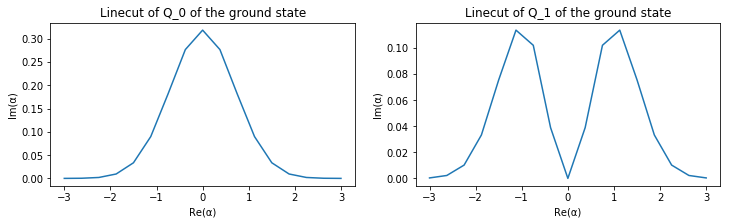

In [29]:
# Line plots when the imaginary part of alpha is 0
fig1, axes1 = plt.subplots(1, 2, figsize=(12,3))
for i in range(len(alpha)):
    for j in range(len(alpha)):
        if alpha[i, j].imag == 0:
        #print(i)
            pass
line0 = axes1[0].plot(alpha[8,:].real, q_coherent1[8, :])
line0 = axes1[1].plot(alpha[8,:].real, q_coherent2[8, :])
lbl0 = axes1[0].set_title("Linecut of Q_0 of the ground state")
lbl1 = axes1[1].set_title("Linecut of Q_1 of the ground state")
axes1[1].set_xlabel('Re(α)')
axes1[1].set_ylabel('Im(α)')
axes1[0].set_xlabel('Re(α)')
axes1[0].set_ylabel('Im(α)')

plt.show()

